In [1]:
%matplotlib inline

In [2]:
from mocpy import MOC, WCS
import mocpy

from astropy.io import fits

import astropy.units as u
from astropy.coordinates import SkyCoord, Angle

import matplotlib.pyplot as plt

print(mocpy.__version__)

0.10.1


In [3]:
image_path = "../resources/image_with_mask.fits.gz"

with fits.open(image_path) as hdulist:
    moc = MOC.from_fits_image(hdu=hdulist[0], max_norder=10, mask=hdulist[0].data)

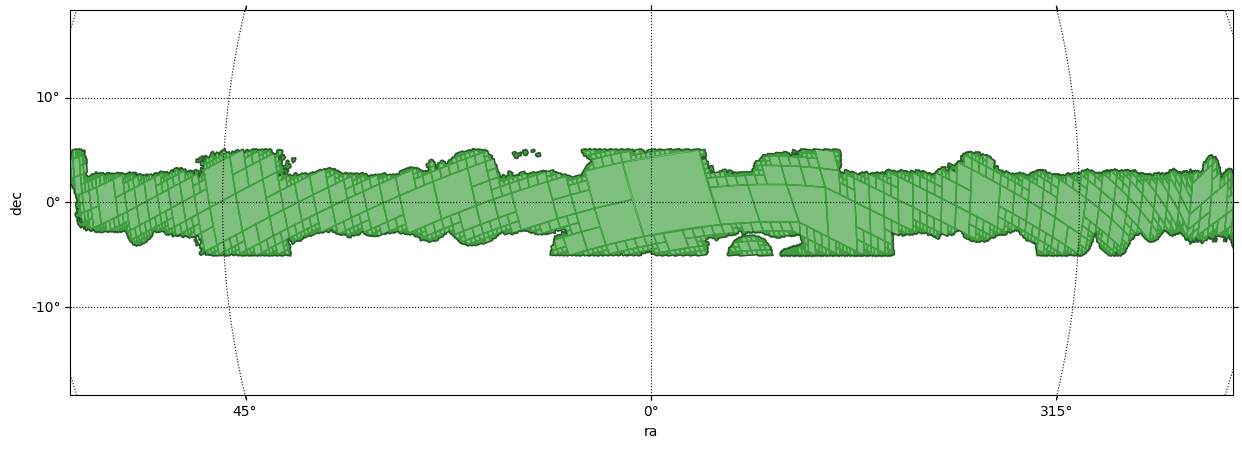

In [4]:
fig = plt.figure(111, figsize=(15, 5))

with WCS(
    fig,
    fov=110 * u.deg,
    center=SkyCoord(0, 0, unit="deg", frame="galactic"),
    coordsys="galactic",
    rotation=Angle(0, u.degree),
    projection="SIN",
) as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    moc.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

plt.xlabel("ra")
plt.ylabel("dec")
plt.grid(color="black", linestyle="dotted")